In [2]:
# 1. Create Tensors and perform basic operations with tensor Before run this program install the tensorflow library

import tensorflow as tf

tensorA = tf.constant([[1, 2], [3, 4], [5, 6]])
tensorB = tf.constant([[1, -1], [2, -2], [3, -3]])
tensorNew = tf.add(tensorA, tensorB)
print(tensorNew)
# Result: [[2, 1], [5, 2], [8, 3]]

tensorA = tf.constant([[1, 2], [3, 4], [5, 6]])
tensorB = tf.constant([[1, -1], [2, -2], [3, -3]])
tensorNew = tf.subtract(tensorA, tensorB)
print(tensorNew)
# Result: [[0, 3], [1, 6], [2, 9]]

tensorA = tf.constant([1, 2, 3, 4])
tensorB = tf.constant([4, 4, 2, 2])
tensorNew = tf.multiply(tensorA, tensorB)
print(tensorNew)
# Result: [4, 8, 6, 8]

tensorA = tf.constant([2, 4, 6, 8])
tensorB = tf.constant([1, 2, 2, 2])
tensorNew = tf.divide(tensorA, tensorB)
print(tensorNew)
# Result: [2.0, 2.0, 3.0, 4.0]

tensorA = tf.constant([1, 2, 3, 4])
tensorNew = tf.square(tensorA)
print(tensorNew)
# Result: [1, 4, 9, 16]

tensorA = tf.constant([[1, 2], [3, 4]])
tensorB = tf.reshape(tensorA, [4, 1])
print(tensorB)
# Result: [[1], [2], [3], [4]]

tf.Tensor(
[[2 1]
 [5 2]
 [8 3]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[0 3]
 [1 6]
 [2 9]], shape=(3, 2), dtype=int32)
tf.Tensor([4 8 6 8], shape=(4,), dtype=int32)
tf.Tensor([2. 2. 3. 4.], shape=(4,), dtype=float64)
tf.Tensor([ 1  4  9 16], shape=(4,), dtype=int32)
tf.Tensor(
[[1]
 [2]
 [3]
 [4]], shape=(4, 1), dtype=int32)


In [4]:
# 2. Create Tensors and apply split & merge operations and statistics operations.

import tensorflow as tf

# MERGE OPERATION:

# Generate random tensors
a = tf.random.normal([1, 2, 3])  # Shape: (1, 2, 3)
b = tf.random.normal([2, 2, 3])  # Shape: (2, 2, 3)

# Concatenate tensors along the first axis (axis=0)
c = tf.concat([a, b], axis=0)

# Print the resulting tensor
print(c)

# Output format: tensor values, shape, and data type

#SPLIT OPERATION:

#Split

import tensorflow as tf

# Generate a random tensor
x = tf.random.normal([3, 2, 3])
print("Original Tensor (x):")
print(x)

# Split the tensor into 3 parts along axis 0
result = tf.split(x, axis=0, num_or_size_splits=3)
print("\nSplit Tensors:")

# Display each split tensor
for idx, tensor in enumerate(result):
    print(f"Tensor {idx + 1}:")
    print(tensor)

#Unstack

import tensorflow as tf

# Generate a random tensor
x = tf.random.normal([3, 2, 3])
print("Original Tensor (x):")
print(x)

# Unstack the tensor along axis 0
result = tf.unstack(x, axis=0)
print("\nUnstacked Tensors:")

# Display each unstacked tensor
for idx, tensor in enumerate(result):
    print(f"Tensor {idx + 1}:")
    print(tensor)

tf.Tensor(
[[[-0.74733526 -0.41225472  0.88897777]
  [-1.2491701   0.01107995  0.27401826]]

 [[ 0.21016707 -0.43360755  0.47343996]
  [ 0.3510138  -1.7533088   1.2822578 ]]

 [[ 0.2860206  -1.242636   -1.5109769 ]
  [-0.502713   -0.490618    0.9364552 ]]], shape=(3, 2, 3), dtype=float32)
Original Tensor (x):
tf.Tensor(
[[[ 0.46705854  0.2108517  -1.8607299 ]
  [ 0.3121986  -1.5055531   1.0683327 ]]

 [[ 0.45705116 -1.0859327  -0.74842036]
  [ 0.6161461  -2.1369805  -0.1289874 ]]

 [[ 0.3600565  -0.11729471  1.5566552 ]
  [-0.00579946 -0.33822253 -0.12826467]]], shape=(3, 2, 3), dtype=float32)

Split Tensors:
Tensor 1:
tf.Tensor(
[[[ 0.46705854  0.2108517  -1.8607299 ]
  [ 0.3121986  -1.5055531   1.0683327 ]]], shape=(1, 2, 3), dtype=float32)
Tensor 2:
tf.Tensor(
[[[ 0.45705116 -1.0859327  -0.74842036]
  [ 0.6161461  -2.1369805  -0.1289874 ]]], shape=(1, 2, 3), dtype=float32)
Tensor 3:
tf.Tensor(
[[[ 0.3600565  -0.11729471  1.5566552 ]
  [-0.00579946 -0.33822253 -0.12826467]]], shape=(

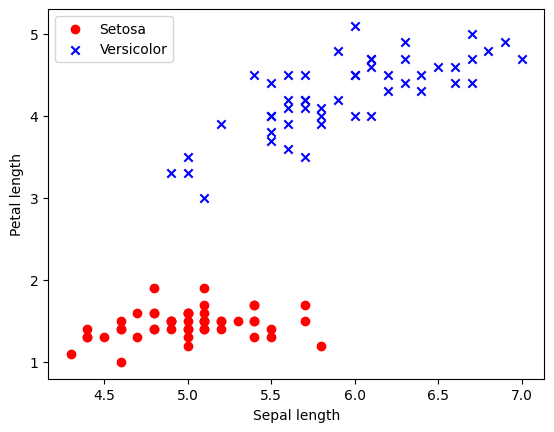

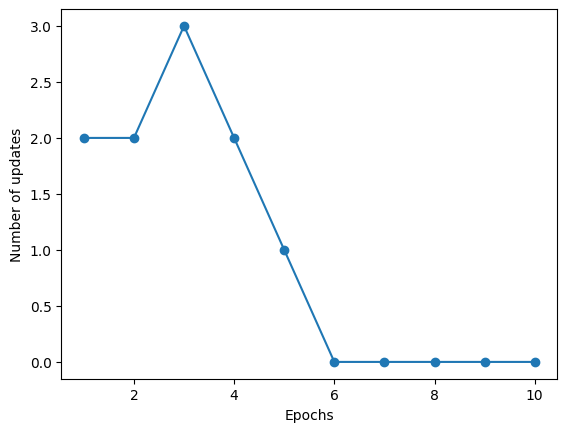

In [5]:
# 3. Design single unit perceptron for classification of iris dataset without using predefined model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron class
class Perceptron:
    def __init__(self, rate=0.01, n_iter=10):
        self.rate = rate
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit the training data."""
        self.weights = np.zeros(1 + X.shape[1])  # Initialize weights
        self.errors = []  # Track misclassification errors

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update  # Bias update
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input."""
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        """Return class label after unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Load the Iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Extract the first 100 samples (Setosa and Versicolor) and the two features
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values  # Sepal length and petal length

# Visualize the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend(loc='upper left')
plt.show()

# Train the perceptron
ppn = Perceptron(rate=0.1, n_iter=10)
ppn.fit(X, y)

# Plot the errors over iterations
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [6]:
# 4. Design, train and test the MLP for tabular data and verify various activation functions and optimizers tensor flow.

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

def mlp_model(layers, units, dropout_rate, input_shape, num_classes):
    """Creates an instance of a multi-layer perceptron model.

    # Arguments
    layers: int, number of 'Dense' layers in the model.
    units: int, output dimension of the layers.
    dropout_rate: float, percentage of input to drop at Dropout layers.
    input_shape: tuple, shape of input to the model.
    num_classes: int, number of output classes.

    # Returns
    An MLP model instance.
    """

    def _get_last_layer_units_and_activation(num_classes):
        # Determine the number of units and activation function for the output layer
        if num_classes == 1:
            return 1, 'sigmoid'  # for binary classification
        else:
            return num_classes, 'softmax'  # for multi-class classification

    op_units, op_activation = _get_last_layer_units_and_activation(num_classes)

    model = models.Sequential()
    model.add(Dropout(rate=dropout_rate, input_shape=input_shape))  # Dropout layer with input shape

    # Add the specified number of Dense layers with ReLU activation
    for _ in range(layers - 1):
        model.add(Dense(units=units, activation='relu'))  # Add hidden layers

    model.add(Dropout(rate=dropout_rate))  # Add Dropout after hidden layers

    # Add the final output layer
    model.add(Dense(units=op_units, activation=op_activation))

    return model

# Example usage for a binary classification problem
model = mlp_model(layers=3, units=64, dropout_rate=0.5, input_shape=(10,), num_classes=1)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.2446 - loss: 2.1044 - val_accuracy: 0.3431 - val_loss: 1.8073
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3429 - loss: 1.8175 - val_accuracy: 0.3901 - val_loss: 1.7202
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.3573 - loss: 1.7681 - val_accuracy: 0.3909 - val_loss: 1.6951
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3836 - loss: 1.7097 - val_accuracy: 0.4098 - val_loss: 1.6470
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3843 - loss: 1.7043 - val_accuracy: 0.4129 - val_loss: 1.6577
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.3894 - loss: 1.6649 - val_accuracy: 0.4109 - val_loss: 1.6306
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.4066 - loss: 1.6355 - val_accuracy: 0.4314 - val_loss: 1.6020
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4024 - loss: 1.6457 - 

<ipython-input-9-d73d6d8ffa4a>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=class_counts, palette="viridis")


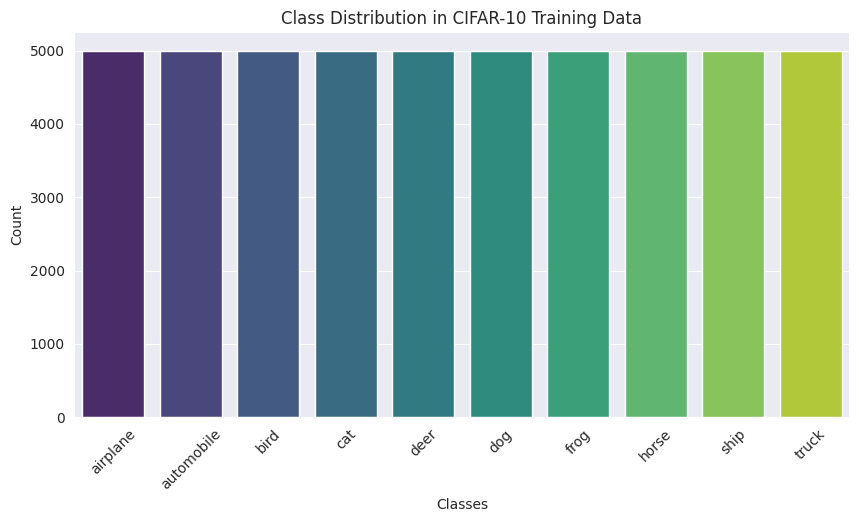

In [ ]:
#5. Design and implement to classify 32x32 images using MLP using tensorflow/keras and check the accuracy.

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Step 2: Build the MLP Model
model = models.Sequential([
    # Flatten the 32x32x3 images to a 1D vector (32*32*3 = 3072 dimensions)
    layers.Flatten(input_shape=(32, 32, 3)),

    # First fully connected layer with 512 units and ReLU activation
    layers.Dense(512, activation='relu'),

    # Dropout layer to reduce overfitting (optional but commonly used)
    layers.Dropout(0.2),

    # Second fully connected layer with 256 units and ReLU activation
    layers.Dense(256, activation='relu'),

    # Output layer with 10 units (one per class) and softmax activation for multi-class classification
    layers.Dense(10, activation='softmax')
])

# Step 3: Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the Model
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=64, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot, verbose=2)

print(f"Test accuracy: {test_acc:.4f}")

# Step 6: Visualize Class Distribution in CIFAR-10 Dataset
labels = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count the number of occurrences of each label in the training set
class_counts = np.bincount(y_train.flatten())
class_names = [labels[i] for i in range(len(class_counts))]

# Plot the class distribution
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_counts, palette="viridis")
plt.title("Class Distribution in CIFAR-10 Training Data")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#6. Design and implement a simple RNN model with tensorflow / keras and check accuracy.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDb dataset (limit to top 10,000 most frequent words)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input size
max_len = 100
train_data = pad_sequences(train_data, maxlen=max_len)
test_data = pad_sequences(test_data, maxlen=max_len)

# Model definition
model = Sequential()

# Embedding layer
model.add(Embedding(10000, 128, input_length=max_len))

# Recurrent layer (LSTM)
model.add(LSTM(64))

# Dense hidden layer
model.add(Dense(64, activation="relu"))

# Output layer (sigmoid for binary classification)
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_data=(test_data, test_labels))

# Evaluate on test data
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# ---- Start of the Prediction Fix ----

# Function to decode review indices into text
def decode_review(text):
    reverse_word_index = imdb.get_word_index()
    reverse_word_index = {value + 3: key for key, value in reverse_word_index.items()}  # Adjust for reserved indices
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Test with custom predictions
def preprocess_input(texts):
    # Tokenize and pad the new input text
    sequences = imdb.get_word_index()  # This is unnecessary as the dataset is already tokenized
    # You'd typically re-use a tokenizer here if you were doing text processing

    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_len)
    return padded_sequences

reviews = [
    "I loved it! Highly recommend it to anyone and everyone looking for a great movie to watch.",
    "This was awful! I hated it so much, nobody should watch this. The acting was terrible, the music was terrible, overall it was just bad."
]

# Preprocess input reviews and make predictions
preprocessed_reviews = preprocess_input(reviews)

# Make predictions
predictions = model.predict(preprocessed_reviews)

# Output predictions
for review, pred in zip(reviews, predictions):
    print(f"Review: {review}")
    print(f"Prediction: {'Positive' if pred > 0.5 else 'Negative'}, Confidence: {pred[0]:.4f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.7226 - loss: 0.5197 - val_accuracy: 0.8379 - val_loss: 0.3541
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 198ms/step - accuracy: 0.9011 - loss: 0.2504 - val_accuracy: 0.8416 - val_loss: 0.4224
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.9339 - loss: 0.1693 - val_accuracy: 0.8416 - val_loss: 0.3738
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 212ms/step - accuracy: 0.9536 - loss: 0.1232 - val_accuracy: 0.8420 - val_loss: 0.5258
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 236ms/step - accuracy: 0.9692 - loss: 0.0851 - val_accuracy: 0.8362 - val_loss: 0.5860
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 114s 292ms/step - accuracy: 0.9802 - loss: 0.0602 - val_accuracy: 0.8333 - val_loss: 0.6408
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 108s 207ms/step - accuracy: 0.9858 - loss: 0.0419 - val_accuracy: 0.8362 - val_loss: 0.6975
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 197ms/step - accuracy: 0.9907 - loss: 0.0299 - v

In [ ]:
#7. Design and implement LSTM model with tensorflow / keras and check accuracy.

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 15
loss_function = BinaryCrossentropy()
max_sequence_length = 300
num_distinct_words = 5000
number_of_epochs = 5
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Pad all sequences
padded_inputs = pad_sequences(x_train, maxlen=max_sequence_length, value=0.0)  # 0.0 corresponds to <PAD>
padded_inputs_test = pad_sequences(x_test, maxlen=max_sequence_length, value=0.0)  # 0.0 corresponds to <PAD>

# Define the Keras model
model = Sequential([
    Embedding(input_dim=num_distinct_words, output_dim=embedding_output_dims, input_length=max_sequence_length),
    LSTM(10),
    Dense(1, activation='sigmoid')
])

# Explicitly build the model to ensure shapes are set
model.build(input_shape=(None, max_sequence_length))

# Give a summary
model.summary()

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Train the model
history = model.fit(
    padded_inputs,
    y_train,
    batch_size=batch_size,
    epochs=number_of_epochs,
    verbose=verbosity_mode,
    validation_split=validation_split
)

# Test the model after training
test_results = model.evaluate(padded_inputs_test, y_test, verbose=False)
print(f"Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}")


x_train shape: (25000,)
x_test shape: (25000,)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 300, 15)             │          75,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 10)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,051 (297.07 KB)

 Trainable params: 76,051 (297.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.6046 - loss: 0.6675 - val_accuracy: 0.8134 - val_loss: 0.4465
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 138ms/step - accuracy: 0.8318 - loss: 0.4075 - val_accuracy: 0.8422 - val_loss: 0.3793
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.8852 - loss: 0.3060 - val_accuracy: 0.8596 - val_loss: 0.3412
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9056 - loss: 0.2557 - val_accuracy: 0.8712 - val_loss: 0.3317
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9210 - loss: 0.2221 - val_accuracy: 0.8638 - val_loss: 0.3415
Test results - Loss: 0.35809406638145447 - Accuracy: 0.8588399887084961


In [ ]:
#8. Design and implement GRU model with tensorflow / keras and check accuracy. Gated Recurrent Unit (GRU)

import tensorflow as tf

# Example values for variables
vocab_size = 10000  # Total number of unique words in the vocabulary
embedding_dim = 16  # Dimensionality of the embedding vectors
max_length = 120  # Maximum length of input sequences

# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=False)),  # GRU with 32 units
    tf.keras.layers.Dense(10, activation='relu'),  # Optional hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Building the model by explicitly passing an input shape
model.build(input_shape=(None, max_length))

# Displaying the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 120, 16)             │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 170,261 (665.08 KB)

 Trainable params: 170,261 (665.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#8. continue

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load IMDb dataset
vocab_size = 10000  # Vocabulary size
max_length = 120  # Sequence length
embedding_dim = 16

# Split the dataset
(training_data, training_labels), (testing_data, testing_labels) = imdb.load_data(num_words=vocab_size)

# Pad sequences
padded = pad_sequences(training_data, maxlen=max_length, padding='post', truncating='post')
testing_padded = pad_sequences(testing_data, maxlen=max_length, padding='post', truncating='post')

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Train the model
num_epochs = 30
history = model.fit(

    padded, training_labels,
    epochs=num_epochs,
    validation_data=(testing_padded, testing_labels),
    batch_size=32  # Optional, to control batch size
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 111s 136ms/step - accuracy: 0.6345 - loss: 0.6024 - val_accuracy: 0.8231 - val_loss: 0.3988
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 138ms/step - accuracy: 0.8730 - loss: 0.3101 - val_accuracy: 0.8291 - val_loss: 0.3874
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 136ms/step - accuracy: 0.9114 - loss: 0.2348 - val_accuracy: 0.8221 - val_loss: 0.4220
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - accuracy: 0.9415 - loss: 0.1647 - val_accuracy: 0.8134 - val_loss: 0.5268
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.9601 - loss: 0.1159 - val_accuracy: 0.8080 - val_loss: 0.5983
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.9739 - loss: 0.0761 - val_accuracy: 0.7948 - val_loss: 0.6601
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - accuracy: 0.9837 - loss: 0.0534 - val_accuracy: 0.7985 - val_loss: 0.8647
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 132ms/step - accuracy: 0.9887 -

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!pip uninstall keras tensorflow -y
!pip install tensorflow


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 12s 274ms/step - accuracy: 0.5182 - loss: 1.1873 - val_accuracy: 0.4815 - val_loss: 0.6923
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.5253 - loss: 0.6944 - val_accuracy: 0.4815 - val_loss: 0.6933
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 246ms/step - accuracy: 0.5253 - loss: 0.6902 - val_accuracy: 0.4815 - val_loss: 0.6904
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.5253 - loss: 0.6948 - val_accuracy: 0.4815 - val_loss: 0.6909
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.5253 - loss: 0.6850 - val_accuracy: 0.4815 - val_loss: 0.6906
Accuracy: 48.151


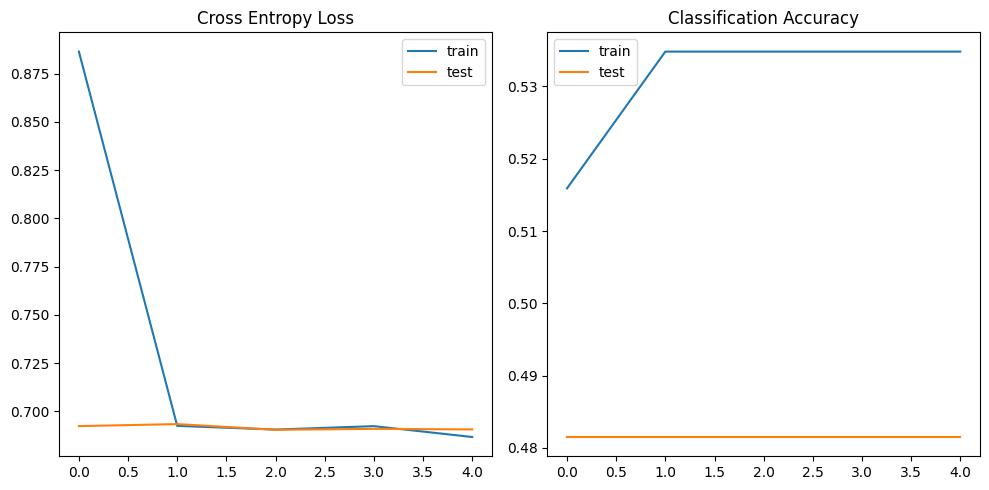

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


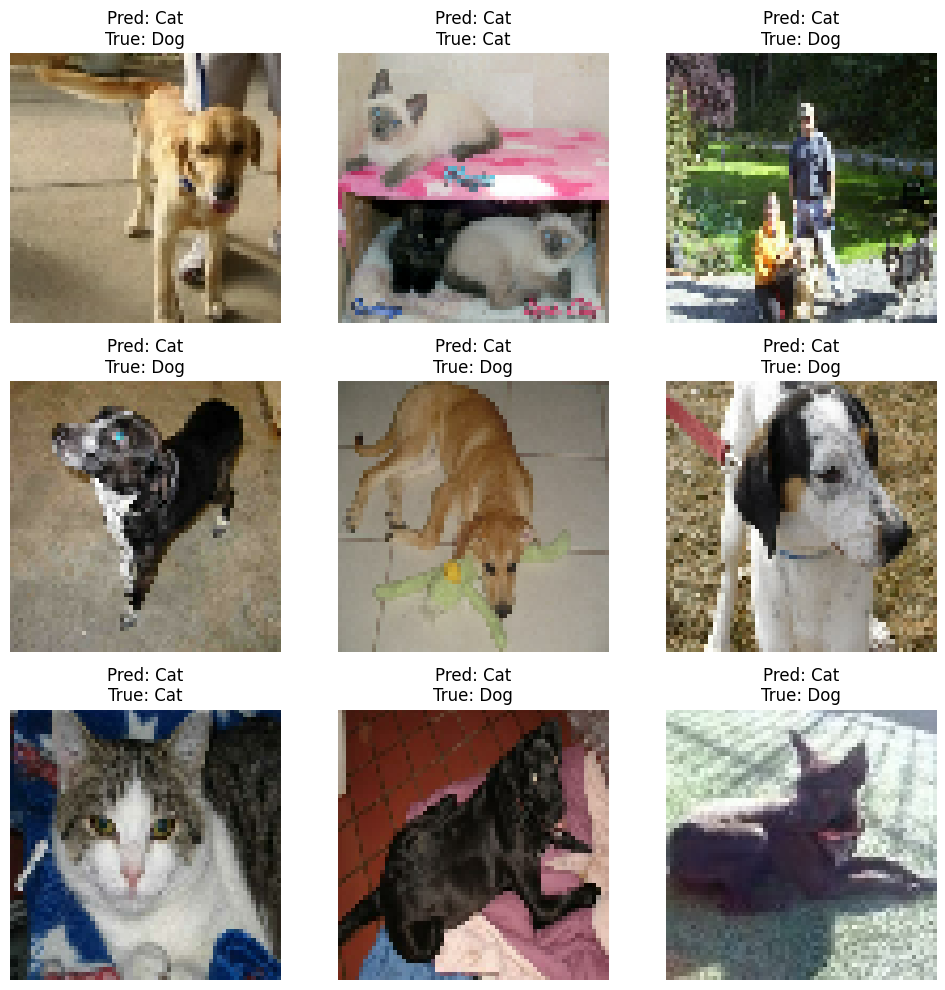

In [ ]:
#9. Design and implement a CNN model to classify multi-category JPG images with tensor flow / keras and check accuracy. Predict labels for new images.

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam

# Load a smaller portion of the dataset (e.g., 5% of the training data)
def load_data():
    # Load dataset using TensorFlow Datasets (5% of the data)
    (train_data, test_data), ds_info = tfds.load(
        'cats_vs_dogs',
        split=['train[:5%]', 'train[80%:85%]'],  # Use only 5% of train and test
        as_supervised=True,
        with_info=True
    )

    # Preprocess the images and labels
    def preprocess_image(image, label):
        image = tf.image.resize(image, (64, 64))  # Resize to smaller dimensions
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return image, label

    train_data = train_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
    test_data = test_data.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

    return train_data, test_data

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (dogs vs cats)

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Plot diagnostic learning curves
def summarize_diagnostics(history):
    # Plot loss and accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to show images with predictions
def show_predictions(model, test_data):
    import numpy as np

    # Get a batch of images and labels from the test data
    for images, labels in test_data.take(1):  # Take one batch of test data
        predictions = model.predict(images)  # Get predictions
        predictions = np.round(predictions).astype(int)  # Convert predictions to 0 or 1

        # Plot the images along with predicted and true labels
        plt.figure(figsize=(10, 10))
        for i in range(9):  # Show 9 images
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"Pred: {'Dog' if predictions[i][0] == 1 else 'Cat'}\n"
                      f"True: {'Dog' if labels[i] == 1 else 'Cat'}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
        break

# Run the test harness for evaluating the model
def run_test_harness():
    # Load the data
    train_data, test_data = load_data()

    # Define model
    model = define_model()

    # Train the model
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=5,  # Only 5 epochs
        verbose=1
    )

    # Evaluate the model
    _, acc = model.evaluate(test_data, verbose=0)
    print('Accuracy: %.3f' % (acc * 100.0))

    # Learning curves
    summarize_diagnostics(history)

    # Show predictions on test data
    show_predictions(model, test_data)

# Entry point
if __name__ == "__main__":
    run_test_harness()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 370s 10s/step - accuracy: 0.5014 - loss: 1.0036 - val_accuracy: 0.5529 - val_loss: 0.6918
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 351s 10s/step - accuracy: 0.5118 - loss: 0.6924 - val_accuracy: 0.5400 - val_loss: 0.6920
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 362s 10s/step - accuracy: 0.4900 - loss: 0.6955 - val_accuracy: 0.5798 - val_loss: 0.6925
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 373s 10s/step - accuracy: 0.5071 - loss: 0.6927 - val_accuracy: 0.5252 - val_loss: 0.6927
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 401s 10s/step - accuracy: 0.5028 - loss: 0.6930 - val_accuracy: 0.5701 - val_loss: 0.6924
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 359s 10s/step - accuracy: 0.5136 - loss: 0.6936 - val_accuracy: 0.4901 - val_loss: 0.6925
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 368s 9s/step - accuracy: 0.5220 - loss: 0.6923 - val_accuracy: 0.4899 - val_loss: 0.6928
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 393s 10s/step - accuracy: 0.5388 - loss: 0.6909 - val_accuracy: 0.5

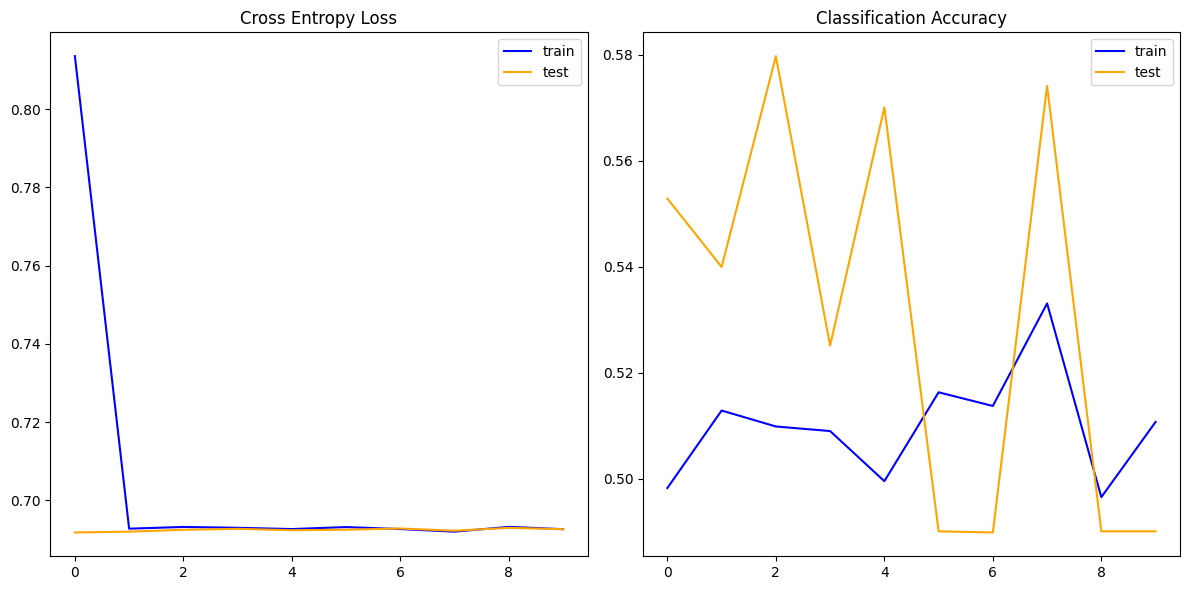

In [ ]:
#10. Design and implement a CNN model to classify multi-category tiff images
#with tensor flow / keras and check the accuracy. Check whether your model is
#overfit / underfit/perfect fit and apply the techniques to avoid over fit and
#under fit like regularizes, dropouts etc.

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import SGD

# Load a smaller portion of the dataset (e.g., 10% of the training data)
def load_data():
    # Load dataset using TensorFlow Datasets (10% of the data)
    (train_data, test_data), ds_info = tfds.load(
        'cats_vs_dogs',
        split=['train[:10%]', 'train[80%:]'],  # Using 10% of the training data
        as_supervised=True,
        with_info=True
    )

    # Preprocess the images and labels
    def preprocess_image(image, label):
        image = tf.image.resize(image, (200, 200))
        image = image / 255.0  # Normalize pixel values to [0, 1]
        return image, label

    train_data = train_data.map(preprocess_image).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
    test_data = test_data.map(preprocess_image).batch(64).prefetch(tf.data.experimental.AUTOTUNE)

    return train_data, test_data

# Define CNN model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (dogs vs cats)

    # Compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Plot diagnostic learning curves
def summarize_diagnostics(history):
    # Plot loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the test harness for evaluating the model
def run_test_harness():
    # Load the data
    train_data, test_data = load_data()

    # Define model
    model = define_model()

    # Train the model
    history = model.fit(
        train_data,
        validation_data=test_data,
        epochs=10,  # Using fewer epochs for faster execution
        verbose=1
    )

    # Evaluate the model
    _, acc = model.evaluate(test_data, verbose=0)
    print('Accuracy: %.3f' % (acc * 100.0))

    # Learning curves
    summarize_diagnostics(history)

# Entry point
if __name__ == "__main__":
    run_test_harness()


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 996ms/step - accuracy: 0.1241 - loss: 4.0144 - val_accuracy: 0.1300 - val_loss: 3.1195
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 961ms/step - accuracy: 0.2041 - loss: 2.3528 - val_accuracy: 0.0800 - val_loss: 3.1246
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 978ms/step - accuracy: 0.2414 - loss: 2.1142 - val_accuracy: 0.1050 - val_loss: 2.7484
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2334 - loss: 2.0671 - val_accuracy: 0.1050 - val_loss: 3.1501
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 974ms/step - accuracy: 0.2628 - loss: 1.9639 - val_accuracy: 0.1050 - val_loss: 2.4666
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3099 - loss: 1.8987 - val_accuracy: 0.1150 - val_loss: 2.8401
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 958ms/step - accuracy: 0.3484 - loss: 1.8457 - val_accuracy: 0.2050 - val_loss: 2.5693
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 970ms/step - accuracy: 0.3518 - loss: 1.8026 - val_accuracy: 

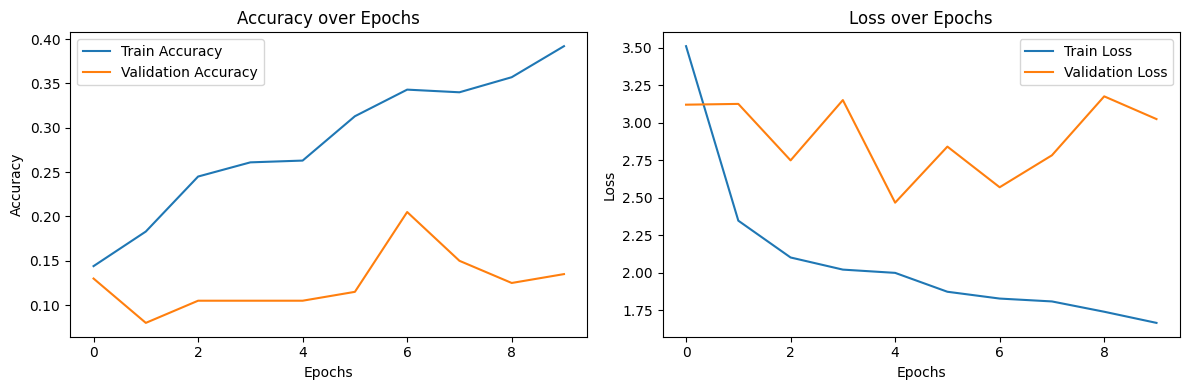

In [ ]:
#11.Implement some CNN architectures (LeNet, Alexnet, VGG, etc) model to
#classify multi category Satellite images with
#tensorflow / keras and check the accuracy. Check whether your model is overfit /
#underfit / perfect fit and apply the
#techniques to avoid overfit and underfit.

# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

# Take a smaller subset for faster execution
x_train = x_train_full[:1000]
y_train = y_train_full[:1000]
x_test = x_test_full[:200]
y_test = y_test_full[:200]

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels

# Define the AlexNet-inspired model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(96, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the small subset
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.3376 - val_loss: 0.1679
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1578 - val_loss: 0.1358
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.1308 - val_loss: 0.1197
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1165 - val_loss: 0.1123
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1102 - val_loss: 0.1078
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.1060 - val_loss: 0.1050
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1028 - val_loss: 0.1028
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1010 - val_loss: 0.1006
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0990 - val_loss: 0.0986
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0971 - val_loss: 0.0973
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Original Test Images
Noisy Test Images
Denoised Test Images


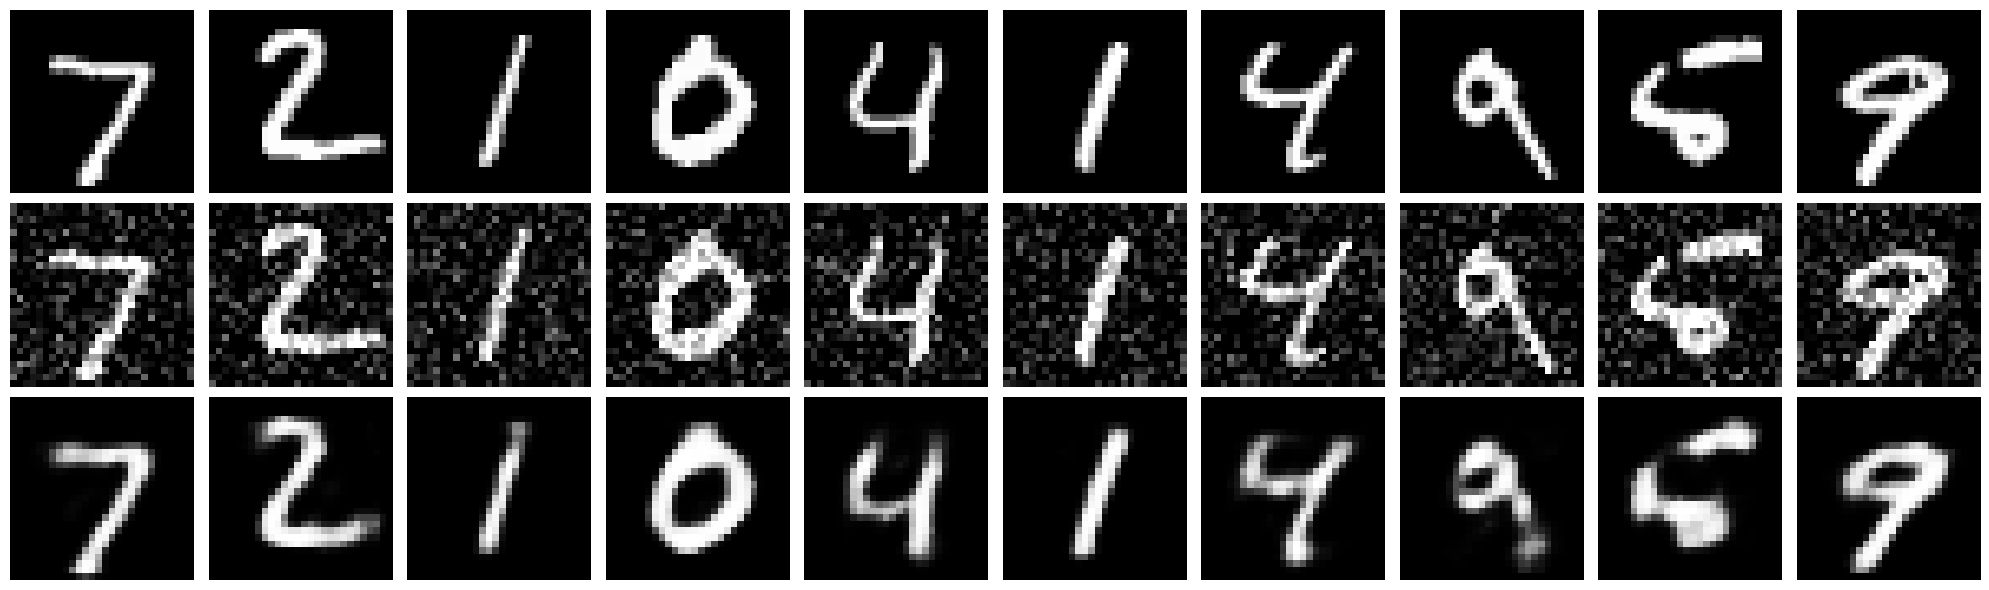

In [ ]:
#12. Implement an Autoencoder to de-noise image.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the dataset
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten images for the autoencoder
X_train = X_train.reshape((X_train.shape[0], -1))  # Shape: (60000, 784)
X_test = X_test.reshape((X_test.shape[0], -1))     # Shape: (10000, 784)

# Add noise to the images
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

# Clip the values to maintain valid range
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Build the Autoencoder model
autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Encoder
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),                     # Decoder
    Dense(784, activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(X_train_noisy, X_train, epochs=10, batch_size=256, validation_split=0.2)

# Denoise the test set
denoised_images = autoencoder.predict(X_test_noisy)

# Reshape images for visualization
X_test = X_test.reshape((-1, 28, 28))
X_test_noisy = X_test_noisy.reshape((-1, 28, 28))
denoised_images = denoised_images.reshape((-1, 28, 28))

# Plotting the results
plt.figure(figsize=(20, 6))

# Display original test images
print("Original Test Images")
for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')

# Display noisy test images
print("Noisy Test Images")
for i in range(10):
    plt.subplot(3, 10, i + 11)
    plt.imshow(X_test_noisy[i], cmap='gray')
    plt.axis('off')

# Display denoised test images
print("Denoised Test Images")
for i in range(10):
    plt.subplot(3, 10, i + 21)
    plt.imshow(denoised_images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


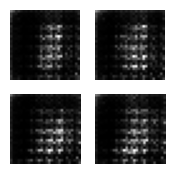

<ipython-input-7-af7895ee5921>:135: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


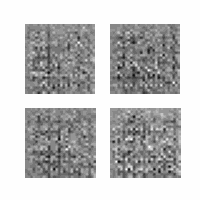

In [ ]:
#13. IMPLEMENT A GAN APPLICATION TO CONVERT IMAGES.

import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import imageio
from IPython import display

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
# Use only the first 1000 images for faster training
train_images = train_images[:1000].reshape(1000, 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize images to [-1, 1]

BUFFER_SIZE = 1000
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Define the generator
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*64, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 64)))
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

generator = make_generator_model()

# Define the discriminator
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

discriminator = make_discriminator_model()

# Define loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training loop
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 4
seed = tf.random.normal([num_examples_to_generate, noise_dim])

@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch + 1}/{epochs} completed')

    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(2, 2))

    for i in range(predictions.shape[0]):
        plt.subplot(2, 2, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:03d}.png')
    plt.show()

# Train the GAN
train(train_dataset, EPOCHS)

# Create a GIF of the generated images
anim_file = 'small_dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = sorted(glob.glob('image_at_epoch_*.png'))
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Display the generated GIF
display.Image(open(anim_file, 'rb').read())
